In [4]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

import chardet
from scipy import stats
import missingno
import missingno as mno
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import xgboost as xg
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

In [ ]:
train =  pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train.isnull().sum().sort_values()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                  1463
Outlet_Size                  2410
dtype: int64

In [9]:
test.isnull().sum().sort_values()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                   976
Outlet_Size                  1606
dtype: int64

In [10]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

Visualizing the data

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

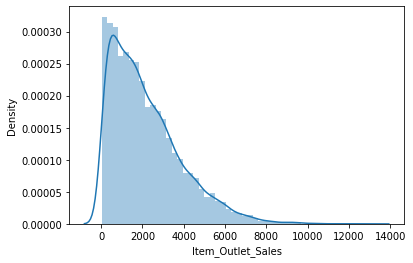

In [11]:
sns.distplot(train['Item_Outlet_Sales'])

In [12]:
# Check for skewness and kurtosis
print("Skewness ", train['Item_Outlet_Sales'].skew())
print("Kurtosis ", train['Item_Outlet_Sales'].kurt())

Skewness  1.1775306028542796
Kurtosis  1.6158766814287264


Relationship of Outlet sales with numerical variables

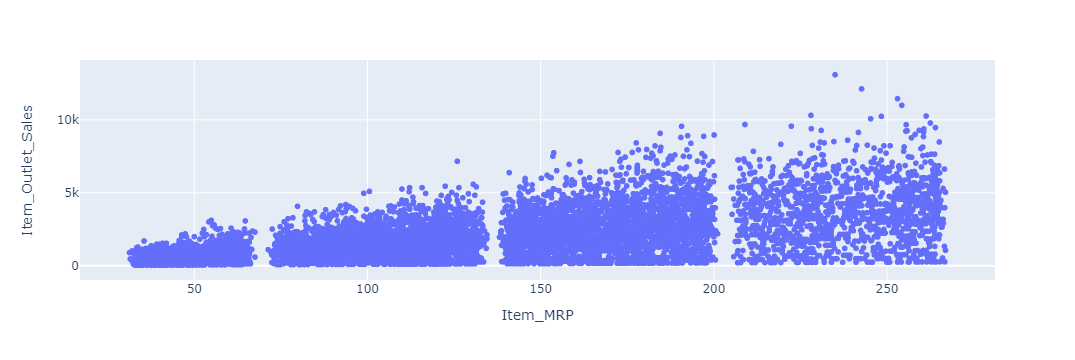

In [13]:
# Scatter plot of item weight v/s outlet sales
sale_MRP = pd.concat([train['Item_Outlet_Sales'],train['Item_MRP']],axis=1)
px.scatter(sale_MRP,x='Item_MRP',y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

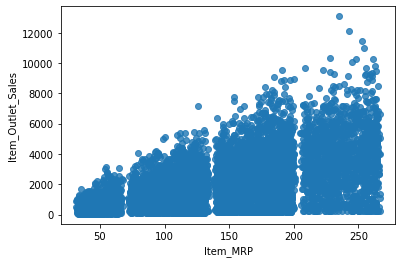

In [14]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=sale_MRP)

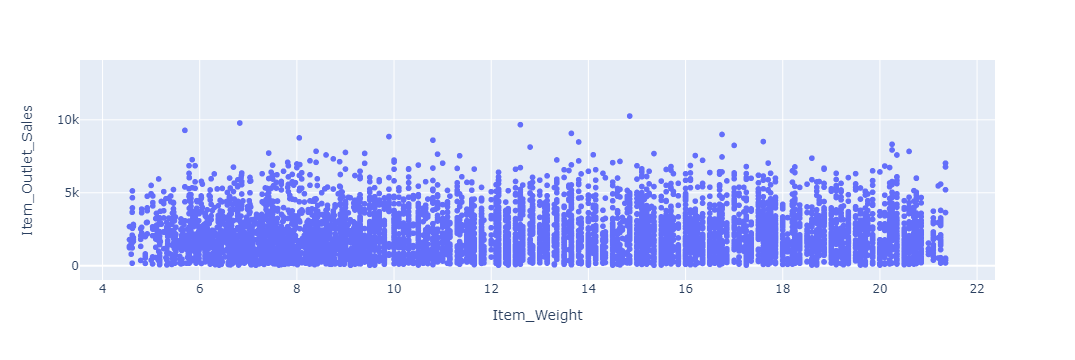

In [15]:
sale_weight = pd.concat([train['Item_Outlet_Sales'],train['Item_Weight']],axis=1)
px.scatter(sale_weight,x='Item_Weight',y='Item_Outlet_Sales')

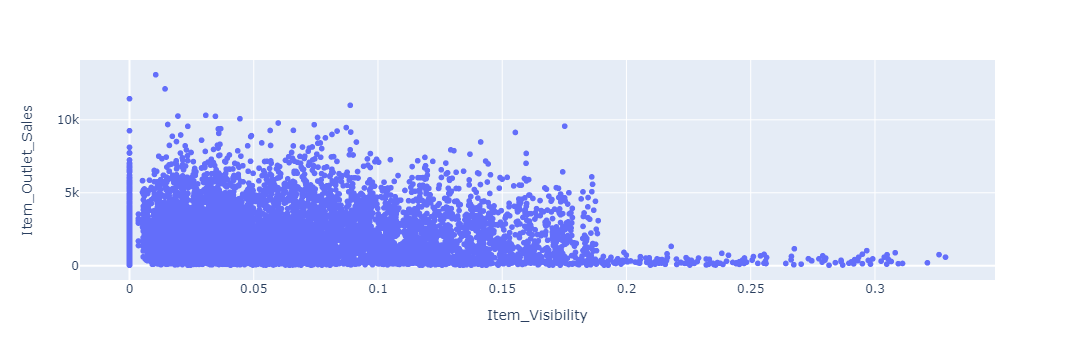

In [16]:
sale_visibility = pd.concat([train['Item_Outlet_Sales'],train['Item_Visibility']],axis=1)
px.scatter(sale_visibility,x='Item_Visibility',y='Item_Outlet_Sales')

Relationship of outlet sale with categorical features

In [17]:
cat_var = [cname for cname in train if train[cname].dtype == 'object']
cat_test = [cname for cname in test if test[cname].dtype == 'object']

In [18]:
print("Categories in train data are")
for j in cat_var:
    col_train = train[j].unique()
    print(j,'-',col_train)
print("*"*60)
print("Categories in test data are")
for i in cat_test:
    col_test = test[i].unique()
    print(i,'-',col_test)

Categories in train data are
Item_Identifier - ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content - ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type - ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier - ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size - ['Medium' nan 'High' 'Small']
Outlet_Location_Type - ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type - ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
************************************************************
Categories in test data are
Item_Identifier - ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Item_Fat_Content - ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Item_Type - ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'H

Dealing with Inconsistent Data Entries

In [19]:
train_df = train.copy(deep=True)
test_1 = test.copy(deep=True)

In [20]:
fat = train_df['Item_Fat_Content'].unique()
fat.sort()
fat

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

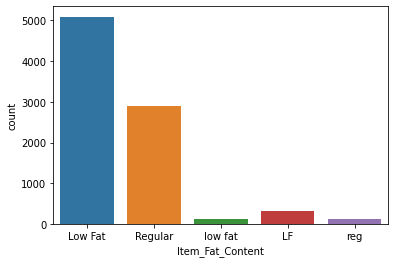

In [21]:
sns.countplot(train_df['Item_Fat_Content'])

In [22]:
# Converting fat content to lower case
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].str.lower()
test_1['Item_Fat_Content'] = test_1['Item_Fat_Content'].str.lower()
# removing trailing white spaces
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].str.strip()
test_1['Item_Fat_Content'] = test_1['Item_Fat_Content'].str.strip()

In [23]:
fat = train_df['Item_Fat_Content'].unique()
fat.sort()
fat

array(['lf', 'low fat', 'reg', 'regular'], dtype=object)

In [24]:
matches_lf = fuzzywuzzy.process.extract("low fat",fat , limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_reg = fuzzywuzzy.process.extract("regular",fat , limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
# take a look at them
print("Low fat",matches_lf)
print("\nRegular",matches_reg)

Low fat [('low fat', 100), ('lf', 22)]

Regular [('regular', 100), ('reg', 60)]


In [25]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 0):
    # get a list of unique strings
    strings = df[column].unique()    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match  
    # let us know the function's done
    print("All Set👍")

In [26]:
# use the function we just wrote to replace close matches to "south korea" with "south korea"
replace_matches_in_column(df=train_df, column='Item_Fat_Content', string_to_match="low fat")
replace_matches_in_column(df=train_df, column='Item_Fat_Content', string_to_match="regular")
replace_matches_in_column(df=test_1, column='Item_Fat_Content', string_to_match="low fat")
replace_matches_in_column(df=test_1, column='Item_Fat_Content', string_to_match="regular")

All Set👍
All Set👍
All Set👍
All Set👍


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

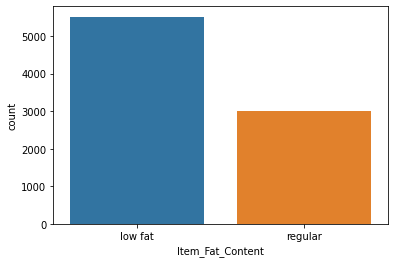

In [27]:
sns.countplot(train_df['Item_Fat_Content'])

In [28]:
fat = train_df['Item_Fat_Content'].unique()
fat.sort()
fat

array(['low fat', 'regular'], dtype=object)

In [29]:
#Determine average visibility of a product
visibility_avg = train_df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (train_df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
train_df.loc[missing_values,'Item_Visibility'] = train_df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(train_df['Item_Visibility'] == 0))

Number of 0 values initially: 526
Number of 0 values after modification: 0


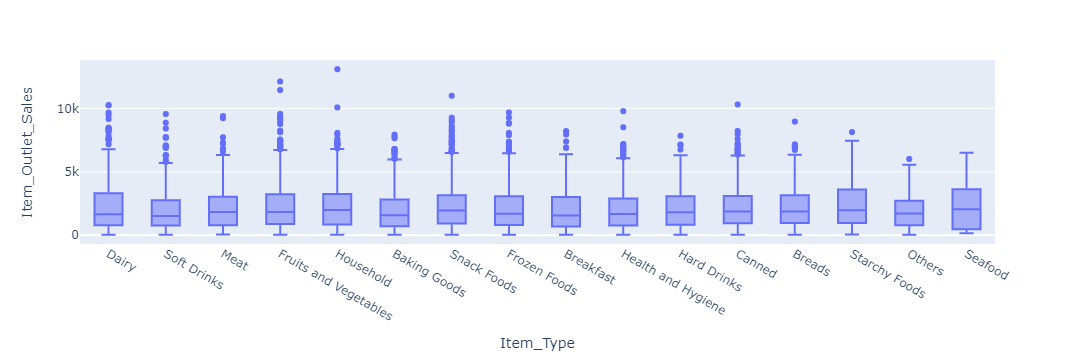

In [30]:
sale_type = pd.concat([train_df['Item_Outlet_Sales'],train_df['Item_Type']],axis=1)
px.box(sale_type,x='Item_Type',y='Item_Outlet_Sales')

In [31]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

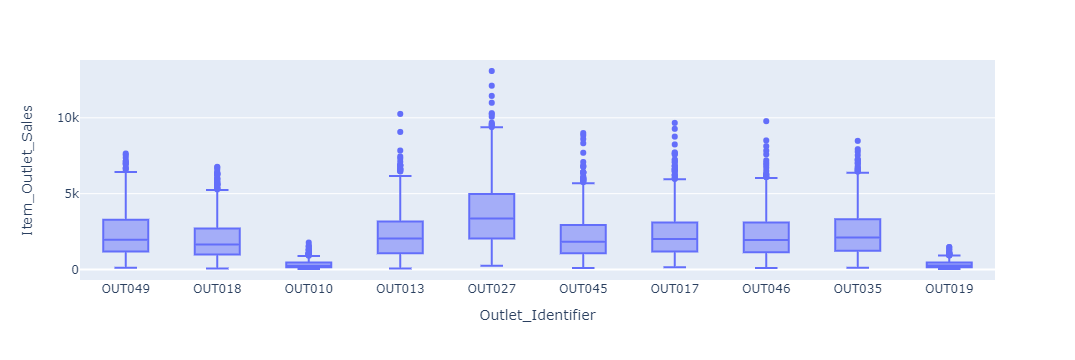

In [32]:
sale_ident = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Identifier']],axis=1)
px.box(sale_ident,x='Outlet_Identifier',y='Item_Outlet_Sales')

In [33]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

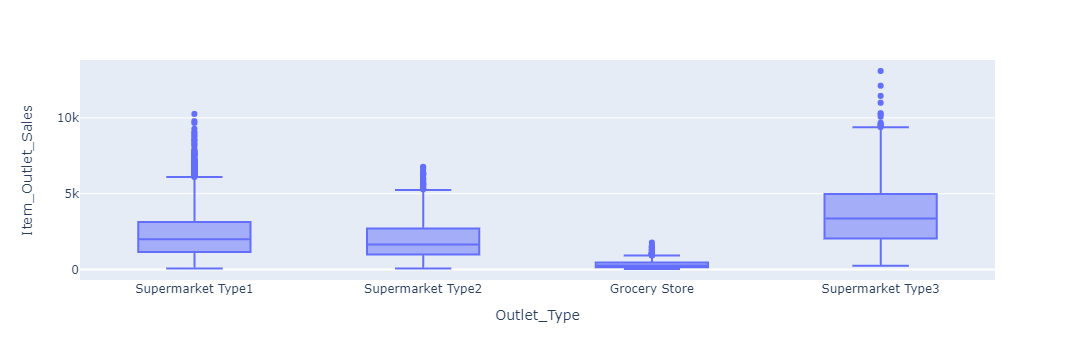

In [34]:
sale_out_type = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Type']],axis=1)
px.box(sale_out_type,x='Outlet_Type',y='Item_Outlet_Sales')

In [35]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

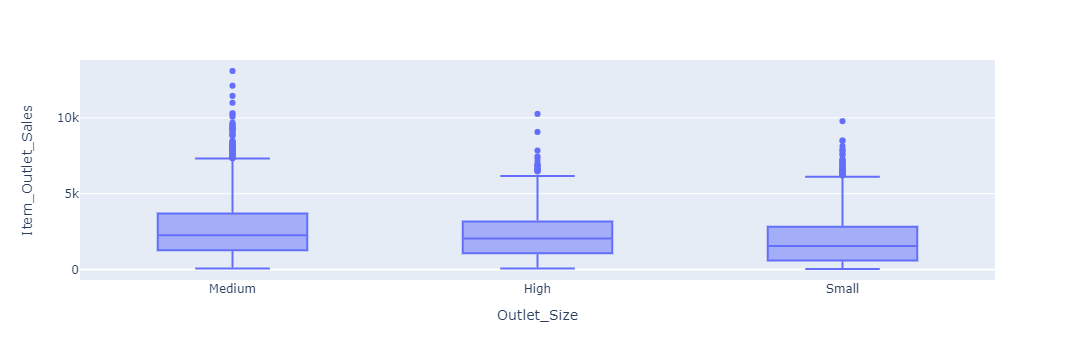

In [36]:
sale_out_size = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Size']],axis=1)
px.box(sale_out_size,x='Outlet_Size',y='Item_Outlet_Sales')

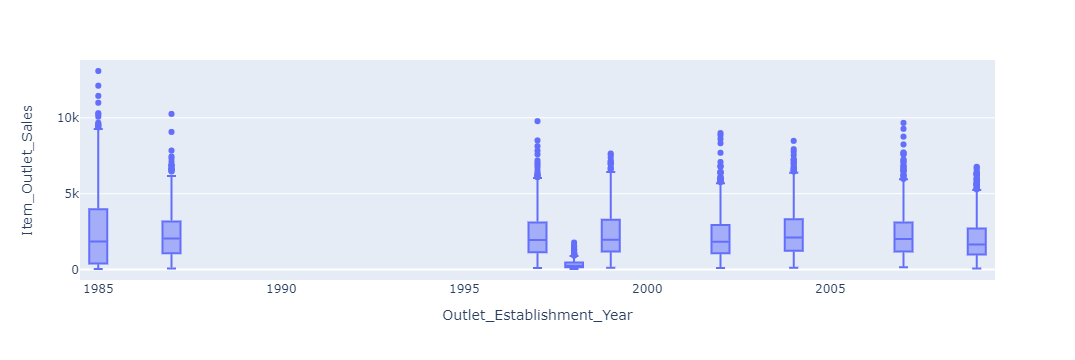

In [37]:
sale_year = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Establishment_Year']],axis=1)
px.box(sale_year,x='Outlet_Establishment_Year',y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

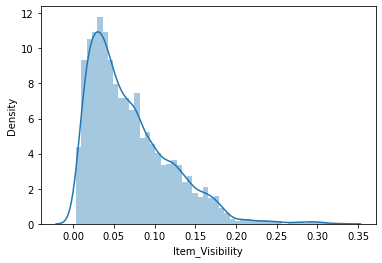

In [38]:
sns.distplot(train_df['Item_Visibility'])

<AxesSubplot:>

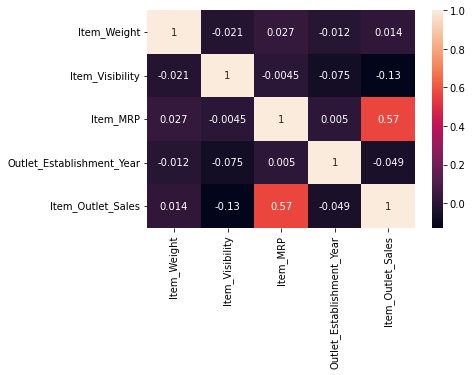

In [39]:
# Checking for correlation matrix
corr_mat = train_df.corr()
sns.heatmap(corr_mat,annot=True)

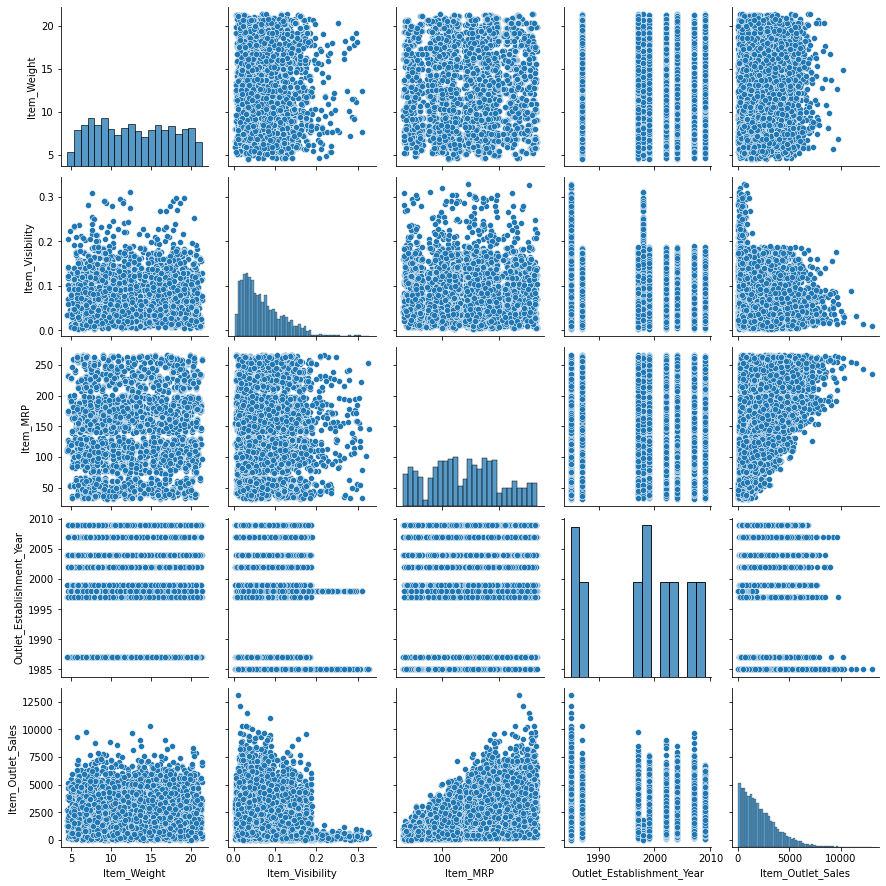

In [40]:
sns.pairplot(train_df)

Missing Data Imputation

In [41]:
train_df['Outlet_Size'] = train_df.Outlet_Size.map({'Small':0,'Medium':1,'High':2})
test_1['Outlet_Size'] = test_1.Outlet_Size.map({'Small':0,'Medium':1,'High':2})

In [42]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys = ['Total','Percent'])
missing_data

Total   Percent
Outlet_Size                 2410  0.282764
Item_Weight                 1463  0.171653
Item_Identifier                0  0.000000
Item_Fat_Content               0  0.000000
Item_Visibility                0  0.000000
Item_Type                      0  0.000000
Item_MRP                       0  0.000000
Outlet_Identifier              0  0.000000
Outlet_Establishment_Year      0  0.000000
Outlet_Location_Type           0  0.000000
Outlet_Type                    0  0.000000
Item_Outlet_Sales              0  0.000000

Outlet size has 28% of the total data missing whereas item weight has 17% missing data.

#Checking if there is any trend in missing data

<AxesSubplot:>

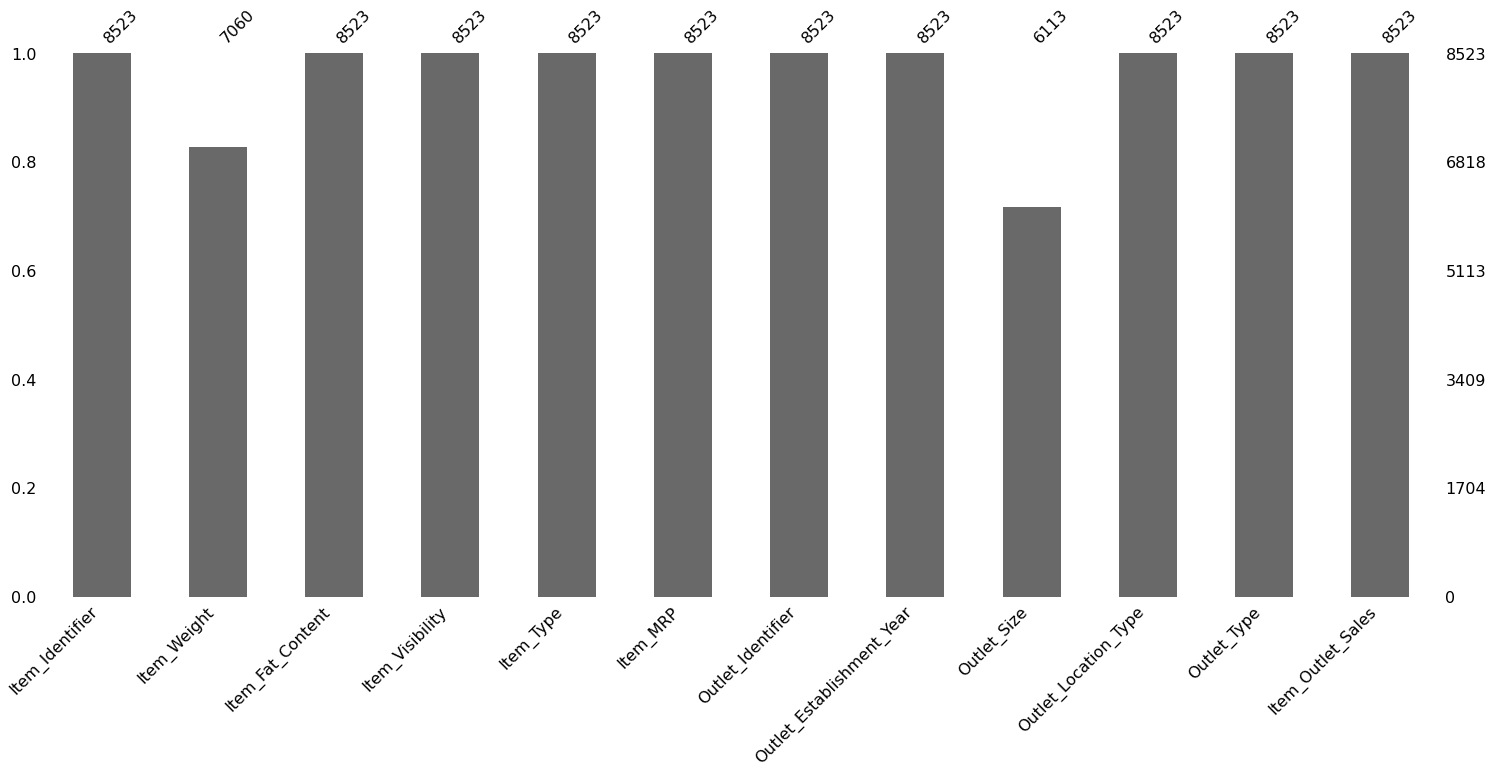

In [43]:
mno.bar(train_df)

<AxesSubplot:>

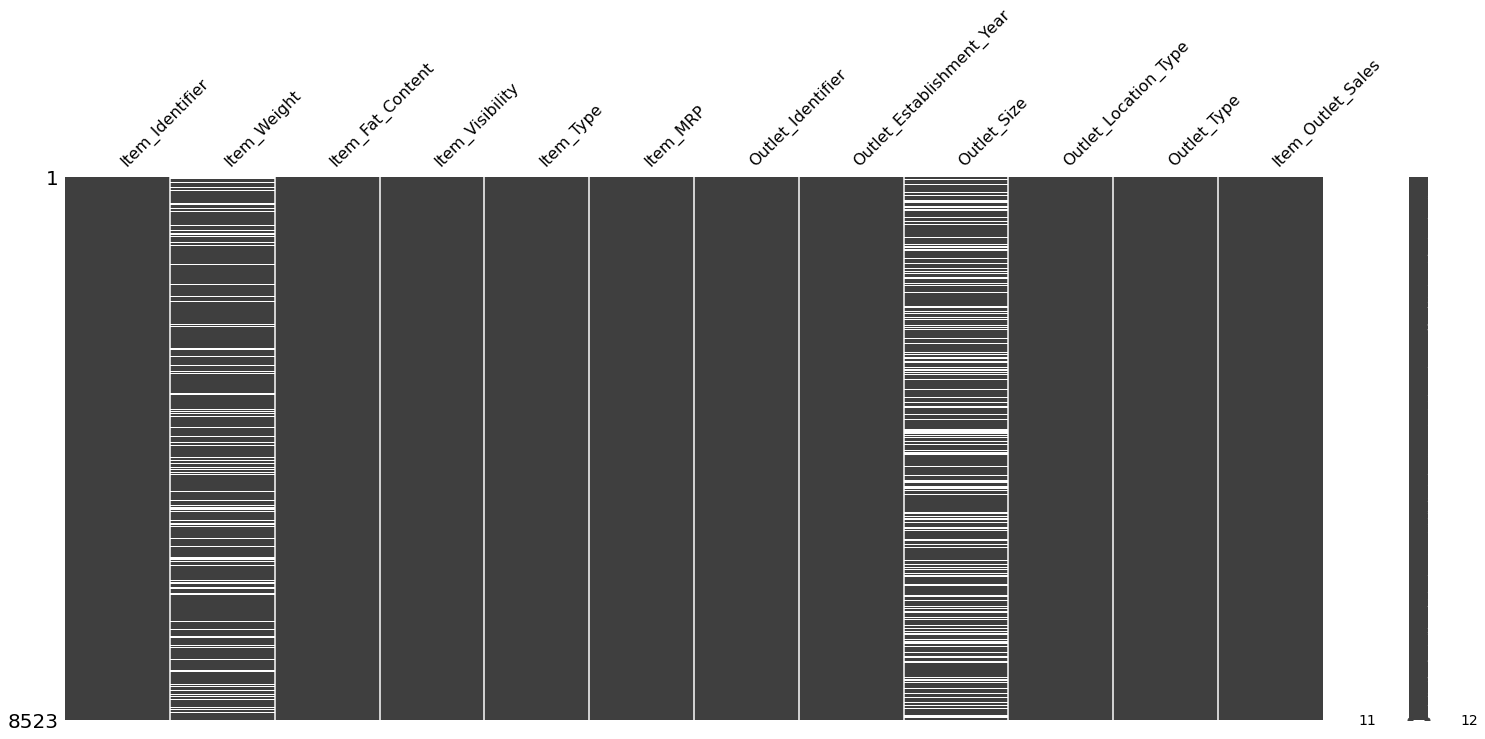

In [44]:
mno.matrix(train_df)

<AxesSubplot:>

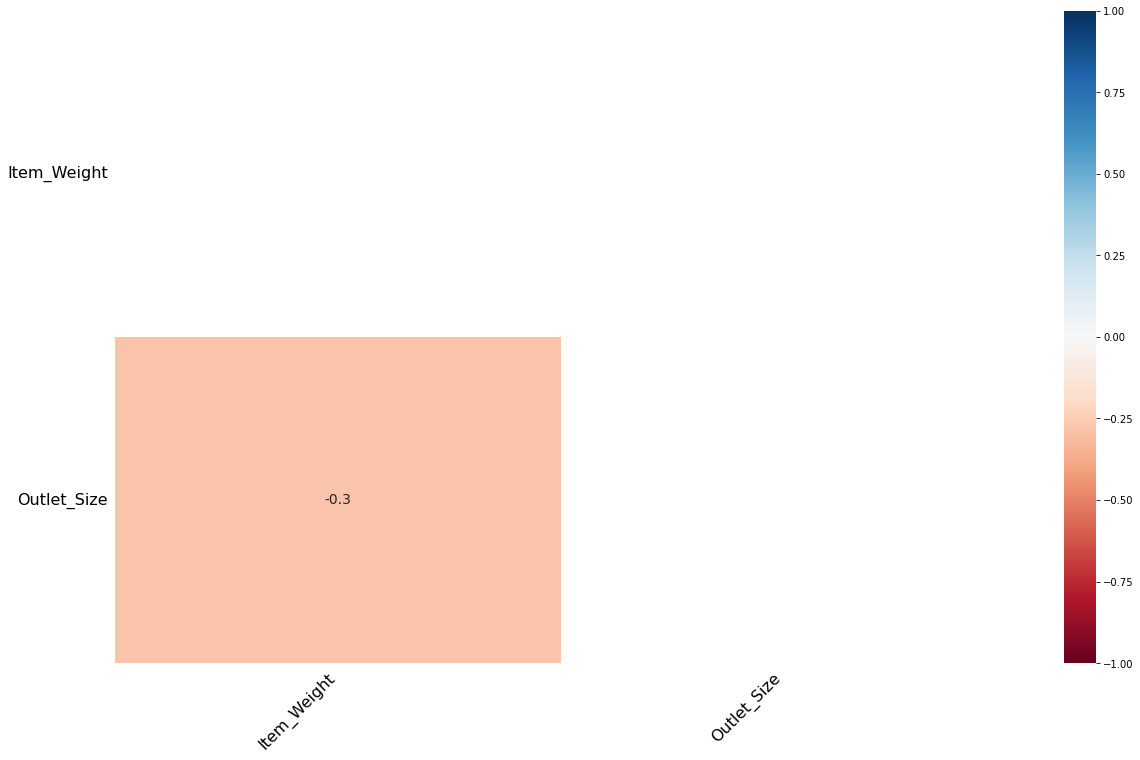

In [45]:
mno.heatmap(train_df)

In [46]:
print("Item Weight",train_df['Item_Weight'][20:30])
print("Outlet Size",train_df['Outlet_Size'][50:60])

Item Weight 20    18.850
21       NaN
22    14.600
23       NaN
24    13.850
25    13.000
26     7.645
27    11.650
28     5.925
29       NaN
Name: Item_Weight, dtype: float64
Outlet Size 50    0.0
51    2.0
52    2.0
53    NaN
54    NaN
55    1.0
56    NaN
57    1.0
58    0.0
59    0.0
Name: Outlet_Size, dtype: float64


In [47]:
imputer = KNNImputer(n_neighbors=2)
train_df['Outlet_Size'] = imputer.fit_transform(train_df[['Outlet_Size']])
train_df['Item_Weight'] = imputer.fit_transform(train_df[['Item_Weight']])
test_1['Outlet_Size'] = imputer.fit_transform(test_1[['Outlet_Size']])
test_1['Item_Weight'] = imputer.fit_transform(test_1[['Item_Weight']])
train_df['Outlet_Size'] = round(train_df['Outlet_Size'],0)
test_1['Outlet_Size'] = round(test_1['Outlet_Size'],0)

In [48]:
print("Item Weight",train_df['Item_Weight'][20:30])
print("Outlet Size",train_df['Outlet_Size'][50:60])

Item Weight 20    18.850000
21    12.857645
22    14.600000
23    12.857645
24    13.850000
25    13.000000
26     7.645000
27    11.650000
28     5.925000
29    12.857645
Name: Item_Weight, dtype: float64
Outlet Size 50    0.0
51    2.0
52    2.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    0.0
59    0.0
Name: Outlet_Size, dtype: float64


Dealing With Categorical Variables

In [49]:
print("Categories in train data are")
for j in cat_var:
    col_train = train_df[j].unique()
    print(j,col_train)

Categories in train data are
Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['low fat' 'regular']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size [1. 2. 0.]
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [50]:
train_df['Item_Type_Combined'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train_df['Item_Type_Combined'] = train_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':"Non_consumable",
                                                             'DR':"Daily"})
train_df['Item_Type_Combined'].value_counts()
test_1['Item_Type_Combined'] = test_1['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test_1['Item_Type_Combined'] = test_1['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':"Non_consumable",
                                                             'DR':"Daily"})
test_1['Item_Type_Combined'].value_counts()

Food              4076
Non_consumable    1087
Daily              518
Name: Item_Type_Combined, dtype: int64

Model Building

In [51]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined']
label = ['Item_Outlet_Sales']
x=train_df[features]
y=train_df[label]
test_model = test_1[features]

In [52]:
train_df[features].head()

Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP Outlet_Identifier  \
0         9.30          low fat         0.016047  249.8092            OUT049   
1         5.92          regular         0.019278   48.2692            OUT018   
2        17.50          low fat         0.016760  141.6180            OUT049   
3        19.20          regular         0.015274  182.0950            OUT010   
4         8.93          low fat         0.008082   53.8614            OUT013   

   Outlet_Establishment_Year  Outlet_Size Outlet_Location_Type  \
0                       1999          1.0               Tier 1   
1                       2009          1.0               Tier 3   
2                       1999          1.0               Tier 1   
3                       1998          1.0               Tier 3   
4                       1987          2.0               Tier 3   

         Outlet_Type Item_Type_Combined  
0  Supermarket Type1               Food  
1  Supermarket Type2              Daily  
2  Supermarket Type1               Food  
3      Grocery Store               Food  
4  Supermarket Type1     Non_consumable

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=0.2)

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   float64
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Type_Combined         8523 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [55]:
object_cols = [cname for cname in x if x[cname].dtype == 'object']
num_X_train = [cname for cname in x if x[cname].dtype in ['int64','float']]

One Hot Encoder

In [56]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
OH_X_train_1 = pd.DataFrame(ohe.fit_transform(x_train[object_cols])) # Your code here
OH_X_valid_1 = pd.DataFrame(ohe.transform(x_test[object_cols])) # Your code here
# ohe.get_feature_names([[object_cols], object_cols.index])
OH_X_train_1.index = x_train[object_cols].index
OH_X_valid_1.index = x_test[object_cols].index
num_X_train = x_train.drop(object_cols,axis =1)
num_X_valid = x_test.drop(object_cols,axis =1)
oh_x_train = pd.concat([num_X_train, OH_X_train_1], axis=1)
oh_x_valid = pd.concat([num_X_valid, OH_X_valid_1],axis=1)
# On Test Data
test_model_oh = pd.DataFrame(ohe.transform(test_model[object_cols]))
test_model_oh.index = test_model[object_cols].index
num_X_test = test_model.drop(object_cols,axis =1)
test_final = pd.concat([num_X_test, test_model_oh], axis=1)

Random Forest

In [57]:
# function for comparing different approaches
model1 = RandomForestRegressor(n_estimators=100, random_state=0)
model1.fit(oh_x_train, y_train)
pred_rf = model1.predict(oh_x_valid)
rand_for = mean_squared_error(y_test, pred_rf,squared=False)
print(rand_for)
pred1 = model1.predict(test_final)

1154.0531113173818


Linear Regression

In [58]:
model2 = LinearRegression()
model2.fit(oh_x_train,y_train)
pred_lin = model2.predict(oh_x_valid)
lin_reg = mean_squared_error(y_test, pred_lin,squared=False)
print(lin_reg)
pred2 = model2.predict(test_final)
pred2 = pred2.reshape(-1)

1141.2741948435357


In [59]:
pred_lin

array([[3830.56224555],
       [1498.28930343],
       [1552.91482843],
       ...,
       [2454.37832797],
       [1883.52434719],
       [2851.18731801]])

In [62]:
lr_accuracy = round(model2.score(oh_x_train,y_train) * 100)
lr_accuracy

56

KNearest Neighbors

In [63]:
model_knn = KNeighborsRegressor()
model_knn.fit(oh_x_train,y_train)
pred_knn = model_knn.predict(oh_x_valid)
knn = mean_squared_error(y_test,pred_knn,squared=False)
print(knn)
test_pred = model_knn.predict(test_final)
test_pred = test_pred.reshape(-1)

1224.46165087392


In [64]:
pred_knn

array([[3964.97216],
       [1593.12624],
       [ 537.9664 ],
       ...,
       [3120.20512],
       [1570.08956],
       [3034.31692]])

In [65]:
knn_accuracy = round(model_knn.score(oh_x_train,y_train) * 100)
knn_accuracy

65

Decision Tree

In [68]:
model_dec = DecisionTreeRegressor()
model_dec.fit(oh_x_train,y_train)
pred_dec = model_dec.predict(oh_x_valid)
dec_tree = mean_squared_error(y_test,pred_dec,squared=False)
print(dec_tree)
pred_test_dec = model_dec.predict(test_final)
pred_test_dec = pred_test_dec.reshape(-1)

1541.3269514196202


In [70]:
pred_dec

array([8132.0812, 1695.1268,  225.0404, ..., 2812.3392, 1874.8928,
       3238.4512])

In [71]:
tree_accuracy = round(model_dec.score(oh_x_train, y_train)*100)
tree_accuracy

100

SVM

In [72]:
model_svm = LinearSVR()
model_svm.fit(oh_x_train,y_train)
pred_svm = model_svm.predict(oh_x_valid)
svm = mean_squared_error(y_test,pred_svm,squared=False)
print(svm)
pred_test_svm = model_svm.predict(test_final)
pred_test_svm = pred_test_svm.reshape(-1)

1316.7559840529557


In [73]:
pred_svm

array([3576.36315203, 1363.31865155, 2384.57038547, ..., 2322.17526685,
       1475.37145786, 2416.59147872])

In [74]:
svm_accuracy = round(model_svm.score(oh_x_train, y_train)*100)
svm_accuracy

43

Stacking Regressor

In [76]:
estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
stack_reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))   
stack_reg.fit(oh_x_train,y_train)
pred_stack = stack_reg.predict(oh_x_valid)
stack_regressor = mean_squared_error(y_test,pred_stack,squared=False)
print(stack_regressor)
stack_ensemble_test = stack_reg.predict(test_final)
stack_ensemble_test = stack_ensemble_test.reshape(-1)

1260.6458523990939


In [77]:
pred_stack

array([3861.04078, 1436.53008, 1829.41866, ..., 1501.11268, 1467.02372,
       2880.71686])

In [78]:
stacking_accuracy = round(stack_reg.score(oh_x_train, y_train)*100)
stacking_accuracy

49

XGBoost

In [79]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(oh_x_train,y_train)
  
# Predict the model
pred_xgb = xgb_r.predict(oh_x_valid)
  
# RMSE Computation
rmse_xgboost = np.sqrt(mean_squared_error(y_test, pred_xgb))
print("RMSE : % f" %(rmse_xgboost))
xbg_test = xgb_r.predict(test_final)
xbg_test = xbg_test.reshape(-1)

[16:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1101.531274


In [84]:
xgb_accuracy = round(xgb_r.score(oh_x_train, y_train)*100)
xgb_accuracy

65

Score Card

In [85]:
result = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','SVM','KNN','XGBoost','Stacking Regressor'],
                       'Score' : [lin_reg,rand_for,dec_tree,svm,knn,rmse_xgboost,stack_regressor]})
result_df = result.sort_values(by='Score',ascending=True)
result_df = result_df.set_index('Score')
result_df

Model
Score                          
1101.531274             XGBoost
1141.274195   LINEAR REGRESSION
1154.053111       RANDOM FOREST
1224.461651                 KNN
1260.645852  Stacking Regressor
1316.755984                 SVM
1541.326951       DECISION TREE